> This notebook follows the [fastai style guidelines](https://docs.fast.ai/dev/style.html#style-guide).

In [1]:
#| default_exp app

## Setup

In [2]:
#| export
from fastai.vision.all import *
import gradio as gr

/Users/salmannaqvi/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/salmannaqvi/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE)
  Referenced from: '/Users/salmannaqvi/lib/python3.10/site-packages/torchvision/image.so'
  Expected in: '/Users/salmannaqvi/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'
  warn(f"Failed to load image Python extension: {e}")


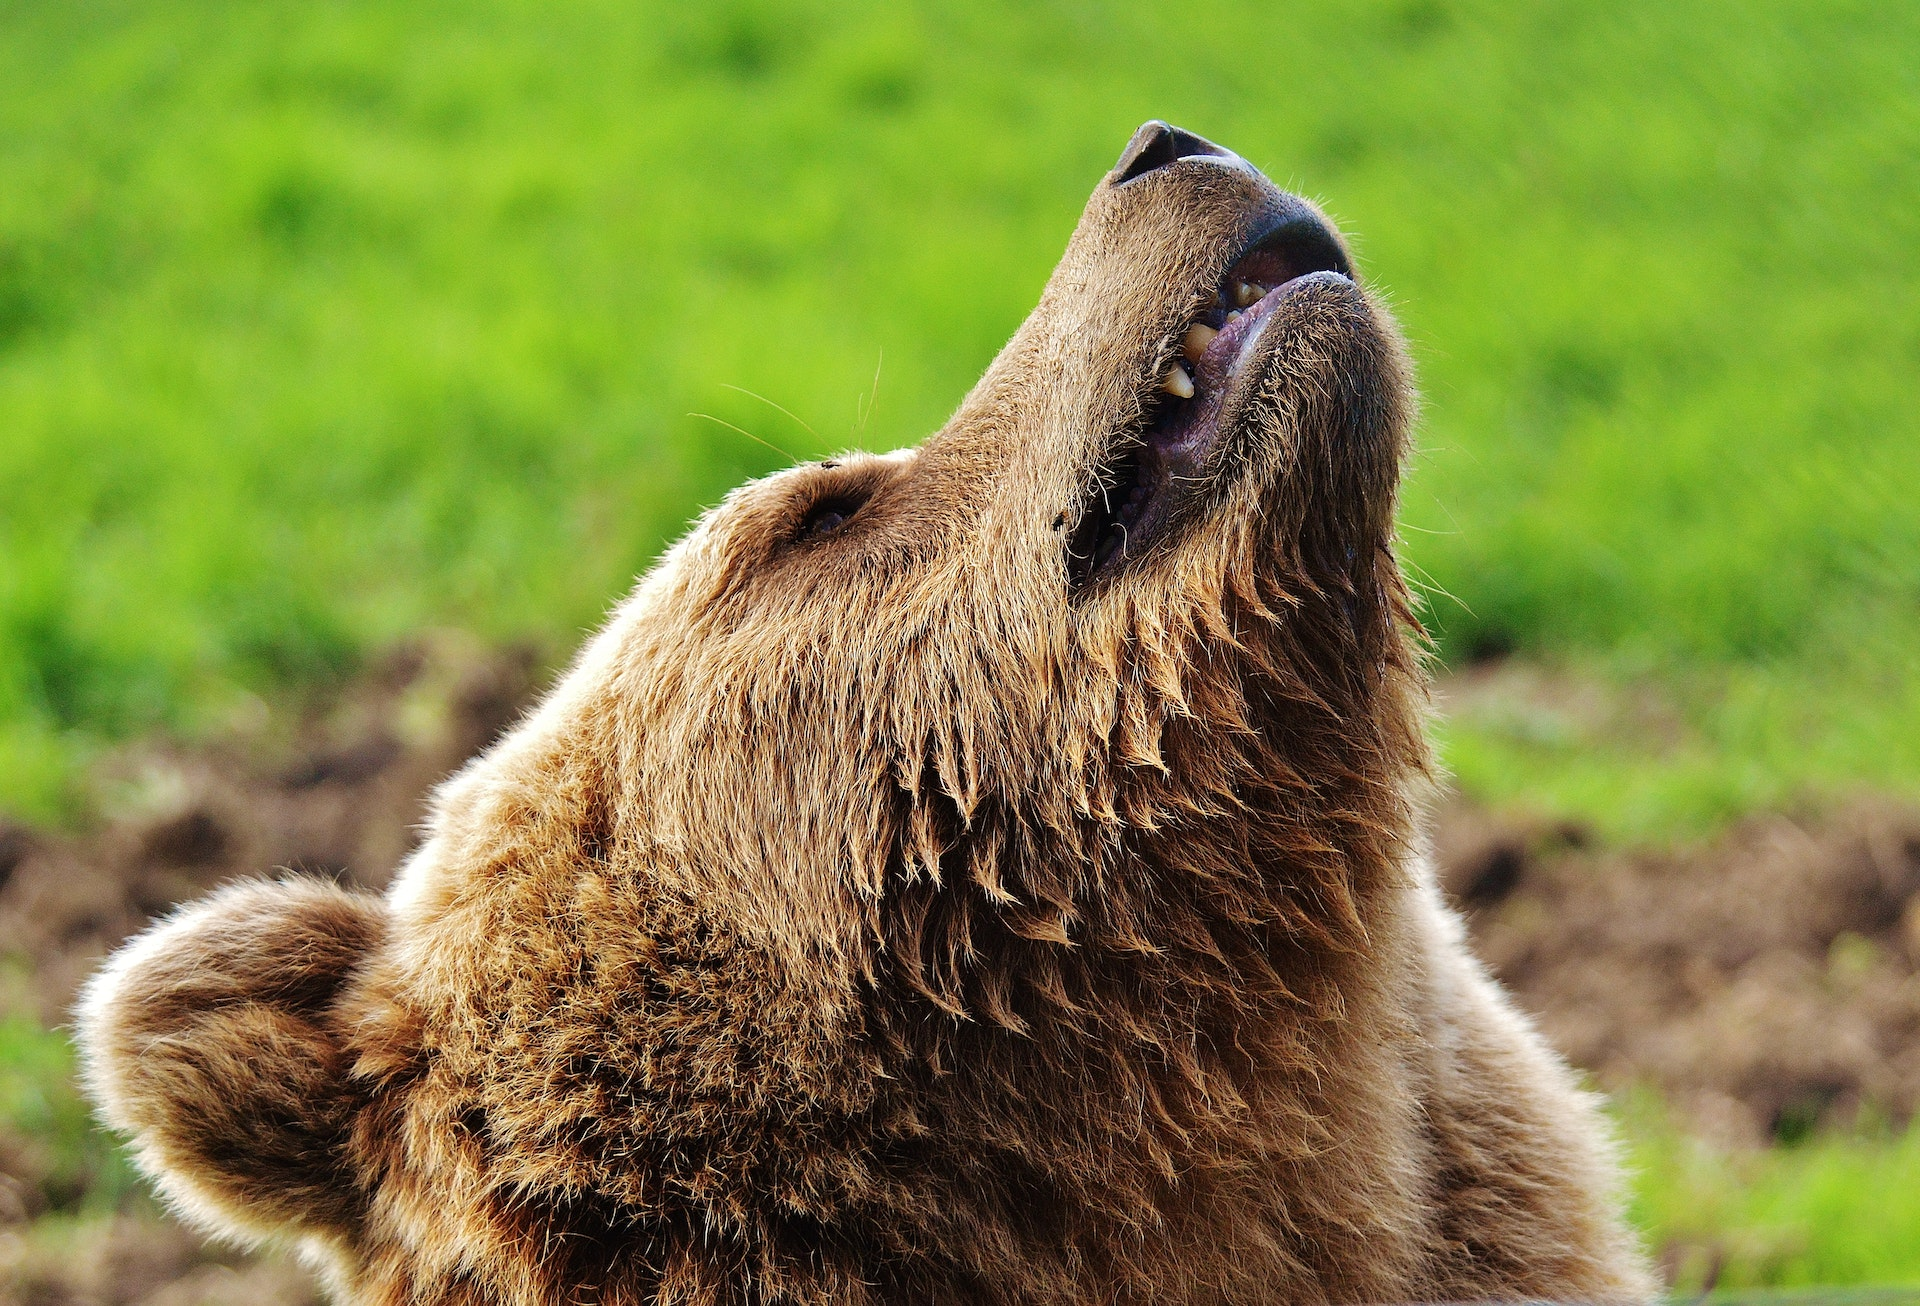

In [3]:
test_img = PILImage.create('example_images/grizzly_1.jpg'); test_img

## Create Learner

In [4]:
#| export
learner = load_learner('model/export.pkl')

In [4]:
learner.predict(test_img)

('grizzly', TensorBase(1), TensorBase([4.7889e-06, 9.9998e-01, 1.0577e-05]))

## Classification Function

In [5]:
#| export

cats = ('Grizzly Bear', 'Black Bear', 'Teddy Bear',)

def classify_img(img):
    preds, idx, probs = learner.predict(img)
    return dict(zip(cats, map(float, probs)))

In [6]:
classify_img(test_img)

{'Grizzly Bear': 4.78894253319595e-06,
 'Black Bear': 0.999984622001648,
 'Teddy Bear': 1.0576571185083594e-05}

## Interface Attributes

In [7]:
#| export

img = gr.Image()
lbl = gr.Label()
examples = [str(img_path) for img_path in Path('example_images/').rglob('*.jpeg')]

title = 'Bear Classifier'
description = 'My first AI model that can tell you whether an image contains a grizzly bear, a black bear, or a teddy bear. This model was trained on the ' \
              'ResNet18 architecture and used the fastai library.'
article = "<p style='text-align: center; font-size: 36px'><a href='https://forbo7.github.io/forblog/posts/2_bear_classifier_model.html' " \
          "targets='_blank'><Blog Post</a></p>"

## Export

In [2]:
from nbdev.export import nb_export

In [3]:
nb_export('app.ipynb', '.')